# **Librerias**

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
from tabulate import tabulate
import dataframe_image as dfi

pd.set_option('display.max_columns', None)
pysqldf = lambda q: sqldf(q, globals())
# pd.set_option('display.max_colwidth', 1000)

# **Data**

In [2]:
dat = pd.read_csv("c1.csv")
dat.shape

(263725, 28)

In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263725 entries, 0 to 263724
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Fecha            263725 non-null  object 
 1   ID               263725 non-null  int64  
 2   Camion_5         263725 non-null  object 
 3   Pickup           263725 non-null  object 
 4   Moto             263725 non-null  object 
 5   Cod              263725 non-null  object 
 6   origen           263725 non-null  int64  
 7   Lat              263725 non-null  float64
 8   Long             263725 non-null  float64
 9   factura          263725 non-null  object 
 10  directoCamion_5  263725 non-null  object 
 11  directoPickup    263725 non-null  object 
 12  directoMoto      263725 non-null  object 
 13  fijoCamion_5     263725 non-null  object 
 14  fijoPickup       263725 non-null  object 
 15  fijoMoto         263725 non-null  object 
 16  height           263725 non-null  int6

In [4]:
dat.head()

,Fecha,ID,Camion_5,Pickup,Moto,Cod,origen,Lat,Long,factura,directoCamion_5,directoPickup,directoMoto,fijoCamion_5,fijoPickup,fijoMoto,height,5-30,30-45,45-75,75-120,120+,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,10-12-17,368224,Q-,Q270.72,Q-,VERIFICACION_MEDIDORES,150277,15.463326,-89.725646,Q316.72,Q-,Q167.85,Q-,Q-,Q102.87,Q-,8,,,,,x,NaN,NaN,NaN,NaN,NaN,NaN
1,19-03-17,368224,Q-,Q262.24,Q-,REVISION_TRANSFORMADOR,150277,15.463326,-89.725646,Q267.24,Q-,Q173.08,Q-,Q-,Q89.16,Q-,8,,,,,x,NaN,NaN,NaN,NaN,NaN,NaN
2,13-03-17,368224,Q-,Q230.04,Q-,REVISION,150277,15.463326,-89.725646,Q236.04,Q-,Q135.72,Q-,Q-,Q94.32,Q-,8,,,,,x,NaN,NaN,NaN,NaN,NaN,NaN
3,14-04-17,368224,Q-,Q268.77,Q-,REVISION,150224,15.463326,-89.725646,Q289.77,Q-,Q174.70,Q-,Q-,Q94.07,Q-,8,,,,,x,NaN,NaN,NaN,NaN,NaN,NaN
4,11-04-17,748633,Q-,Q233.33,Q-,REVISION,150277,14.725681,-90.896437,Q248.33,Q-,Q154.00,Q-,Q-,Q79.33,Q-,8,,,,,x,NaN,NaN,NaN,NaN,NaN,NaN


# **Data Prep**

In [5]:
# Eliminamos columnas extras
dat.drop(columns=["Unnamed: 22","Unnamed: 23","Unnamed: 24","Unnamed: 25","Unnamed: 26","Unnamed: 27"],inplace=True)

# Columnas sin mayusculas
dat.columns = [col.lower().replace("_5","") for col in  dat.columns]

In [6]:
### Cambiando valores de columnas de tiempos
for col in ['5-30', '30-45','45-75', '75-120', '120+']:
    dat[col] = dat[col].str.strip().str.lower()

### COLUMNA DE TIEMPOS
def tiempos_col(df):
    if df["5-30"]=="x":
        value = "5-30"
    elif df["30-45"]=="x":
        value = "30-45"
    elif df["45-75"]=="x":
        value = "45-75"
    elif df["75-120"]=="x":
        value = "75-120"
    else:
        value = "120+"
    return value
dat["tiempo"] = dat.apply(tiempos_col,axis=1)


# Cambiando valores de columnas de vehiculos y costo de vehiculos
for col in ['camion','pickup','moto','directocamion','directopickup',"directomoto","fijocamion","fijopickup","fijomoto","factura"]:
    dat[col] = dat[col].str.strip().str.replace("Q-","N/A").str.replace("Q","")

### COLUMNA DE VEHICULOS
def vehiculos_col(df):
    if df["camion"]!="N/A":
        value = "camion"
    elif df["pickup"]!="N/A":
        value = "pickup"
    else:
        value = "moto"
    return value

def costo_col(df):
    if df["camion"]!="N/A":
        value = float(df["camion"])
    elif df["pickup"]!="N/A":
        value = float(df["pickup"])
    else:
        value = float(df["moto"])
    return value

dat["vehiculo"] = dat.apply(vehiculos_col,axis=1)
dat["costo_total"] = dat.apply(costo_col,axis=1)


### COLUMNA DE COSTO FIJO
def fijo_col(df):
    if df["fijocamion"]!="N/A":
        value = float(df["fijocamion"])
    elif df["fijopickup"]!="N/A":
        value = float(df["fijopickup"])
    else:
        value = float(df["fijomoto"])
    return value
dat["costo_fijo"] = dat.apply(fijo_col,axis=1)


### COLUMNA DE COSTO DIRECTO
def directo_col(df):
    if df["directocamion"]!="N/A":
        value = float(df["directocamion"])
    elif df["directopickup"]!="N/A":
        value = float(df["directopickup"])
    else:
        value = float(df["directomoto"])
    return value
dat["costo_directo"] = dat.apply(directo_col,axis=1)


to_drop_list = ['5-30','30-45','45-75','75-120','120+','camion','pickup','moto','fijocamion',
                'fijopickup','fijomoto','directocamion','directopickup','directomoto']


dat.drop(columns=to_drop_list,inplace=True)

dat["factura"] = dat["factura"].astype("float")
dat["ganancia"] = dat["factura"] - dat["costo_total"]


dat[["vehiculo","factura","costo_total","costo_fijo","costo_directo","ganancia","tiempo"]]

,vehiculo,factura,costo_total,costo_fijo,costo_directo,ganancia,tiempo
0,pickup,316.72,270.72,102.87,167.85,46.0,120+
1,pickup,267.24,262.24,89.16,173.08,5.0,120+
2,pickup,236.04,230.04,94.32,135.72,6.0,120+
3,pickup,289.77,268.77,94.07,174.70,21.0,120+
4,pickup,248.33,233.33,79.33,154.00,15.0,120+
...,...,...,...,...,...,...,...
263720,pickup,163.52,116.52,41.95,74.57,47.0,75-120
263721,pickup,78.77,72.77,28.38,44.39,6.0,30-45
263722,pickup,90.44,57.44,21.83,35.61,33.0,30-45
263723,pickup,43.24,30.24,10.89,19.36,13.0,5-30


In [7]:
dat.rename(columns={"long":"lon"},inplace=True)

dat["fecha"] = dat["fecha"].str.strip()
df_fechas = dat["fecha"].str.split("-",expand=True).rename(columns={0:"day",1:"month",2:"year"})
dat = pd.concat([df_fechas,dat],axis=1).drop(columns="fecha")
dat["margen"] = dat["ganancia"]/dat["costo_total"]
dat.head()

,day,month,year,id,cod,origen,lat,lon,factura,height,tiempo,vehiculo,costo_total,costo_fijo,costo_directo,ganancia,margen
0,10,12,17,368224,VERIFICACION_MEDIDORES,150277,15.463326,-89.725646,316.72,8,120+,pickup,270.72,102.87,167.85,46.0,0.169917
1,19,03,17,368224,REVISION_TRANSFORMADOR,150277,15.463326,-89.725646,267.24,8,120+,pickup,262.24,89.16,173.08,5.0,0.019067
2,13,03,17,368224,REVISION,150277,15.463326,-89.725646,236.04,8,120+,pickup,230.04,94.32,135.72,6.0,0.026082
3,14,04,17,368224,REVISION,150224,15.463326,-89.725646,289.77,8,120+,pickup,268.77,94.07,174.70,21.0,0.078134
4,11,04,17,748633,REVISION,150277,14.725681,-90.896437,248.33,8,120+,pickup,233.33,79.33,154.00,15.0,0.064287


In [8]:
# dat.year.unique()

# Elimino esta columna porque solamente tengo info. del 2017 por lo que no me sirve
dat.drop(columns="year",inplace=True)

# **Datos Generales**

In [9]:
print(dat.id.nunique(),"postes")

74239 postes


In [10]:
print(dat.cod.nunique(),"tipos de servicios")

10 tipos de servicios


In [11]:
print(dat.origen.nunique(),"ubicaciones de servicio")

4 ubicaciones de servicio


**ER 2017**

In [12]:
df_er_2017 = pd.DataFrame({"2017 (Q)":[dat["factura"].sum(),dat["costo_fijo"].sum(),dat["costo_directo"].sum(),dat["ganancia"].sum()]},index=["Ventas","Costo Fijo","Costo Directo","Utilidad Operativa"])
dfi.export(df_er_2017, 'estado_de_resultado_2017.png')
df_er_2017

,2017 (Q)
Ventas,36688096.31
Costo Fijo,10280412.00
Costo Directo,17893607.06
Utilidad Operativa,8514077.00


# **Tarifario**

In [79]:
tarifas = dat.groupby(["cod","tiempo"]).agg({"factura":"mean","ganancia":"mean","margen":"mean",
                                             "costo_total":"mean","costo_fijo":"mean","costo_directo":"mean"}).sort_values(["cod","factura"],ascending=False)
tarifas.columns = [col+"_promedio" for col in tarifas.columns]
dfi.export(tarifas, 'tarifario.png')
tarifas

factura_promedio  ganancia_promedio  \
cod                      tiempo                                        
VISITA_POR_CORRECCION    120+          280.449728          44.632148   
                         75-120        174.579115          45.255579   
                         45-75         131.969850          44.657005   
                         30-45         114.724385          45.521595   
                         5-30           85.789831          43.515228   
VISITA                   120+          248.179329          30.140244   
                         75-120        154.323011          29.296809   
                         45-75         115.487740          28.101695   
                         30-45          97.883180          29.142000   
                         5-30           69.640121          27.772397   
VERIFICACION_MEDIDORES   120+          247.526841          31.467406   
                         75-120        154.454141          28.793545   
                         45-75         115.941707          28.702520   
                         30-45          96.905191          28.449816   
                         5-30           69.527690          28.034895   
VERIFICACION_INDICADORES 120+          273.641202          40.354503   
                         75-120        159.396392          33.506551   
                         45-75         118.135968          30.835743   
                         30-45          99.045812          30.376428   
                         5-30           70.669402          29.428571   
REVISION_TRANSFORMADOR   120+          274.398561          40.399804   
                         75-120        165.039219          36.092723   
                         45-75         120.141893          32.806452   
                         30-45         101.294246          32.584275   
                         5-30           72.761806          31.381646   
REVISION                 120+          252.656505          33.091846   
                         75-120        155.544688          29.699000   
                         45-75         115.847907          28.625000   
                         30-45          97.198763          28.736363   
                         5-30           69.387509          28.017059   
OTRO                     120+          284.403840          43.646568   
                         75-120        173.549582          44.535924   
                         45-75         131.110764          43.769106   
                         30-45         113.285262          43.894032   
                         5-30           88.548780          43.633898   
CAMBIO_PUENTES           120+          289.856916          44.868481   
                         75-120        168.552058          40.626429   
                         45-75         125.093385          37.953846   
                         30-45         107.357757          39.077206   
                         5-30           77.843681          35.305556   
CAMBIO_FUSIBLE           120+          277.170740          43.106561   
                         75-120        169.171630          42.054550   
                         45-75         132.893116          45.812810   
                         30-45         114.950236          46.271521   
                         5-30           87.648734          48.637833   
CAMBIO_CORRECTIVO        120+          243.462524          30.097670   
                         75-120        151.921993          28.228902   
                         45-75         115.178733          27.966036   
                         30-45          96.593910          28.132249   
                         5-30           68.969074          27.728583   

                                 margen_promedio  costo_total_promedio  \
cod                      tiempo                                          
VISITA_POR_CORRECCION    120+           0.195551            235.817580   
                         75-120         0.361828            129.32

# **Graficas**

## Actividad

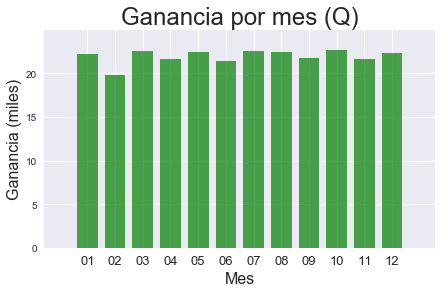

In [74]:
### NUMERO DE VIAJES POR MES
df_monthly_trips = dat.groupby("month").agg({"ganancia":"count"})
df_monthly_trips["ganancia"] = df_monthly_trips["ganancia"]/1000

# plt.figure(figsize=(12,7))
# plt.figure(figsize=(7,4))
plt.bar(np.arange(2,25,2),df_monthly_trips.ganancia,width=1.5,color="green",alpha=0.7)
plt.title("Ganancia por mes (Q)",fontsize=24)

plt.ylabel("Ganancia (miles)",fontsize=16)

plt.xlabel("Mes",fontsize=16)
xticks_names = df_monthly_trips.index
plt.xticks(np.arange(2,25,2),xticks_names,fontsize=13)

plt.margins(0.1)
plt.show()

## Ganancias

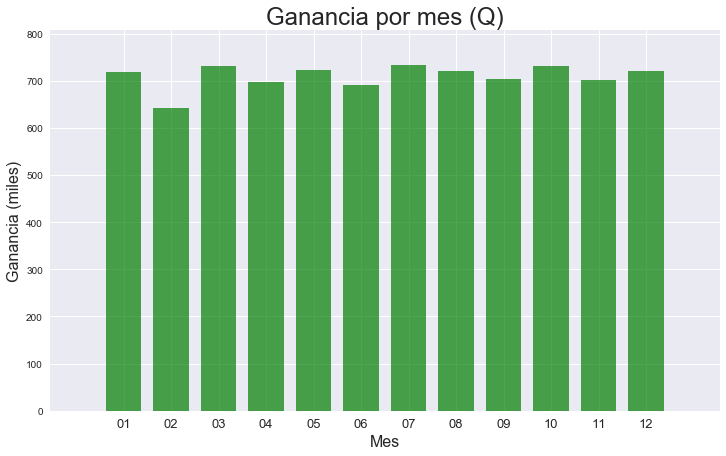

In [67]:
### GANANCIA POR MES
df_monthly_profit = dat.groupby("month").agg({"ganancia":"sum"})
df_monthly_profit["ganancia"] = df_monthly_profit["ganancia"]/1000

plt.figure(figsize=(12,7))
plt.bar(np.arange(2,25,2),df_monthly_profit.ganancia,width=1.5,color="green",alpha=0.7)
plt.title("Ganancia por mes (Q)",fontsize=24)

plt.ylabel("Ganancia (miles)",fontsize=16)

plt.xlabel("Mes",fontsize=16)
xticks_names = df_monthly_profit.index
plt.xticks(np.arange(2,25,2),xticks_names,fontsize=13)

plt.margins(0.1)
plt.show()

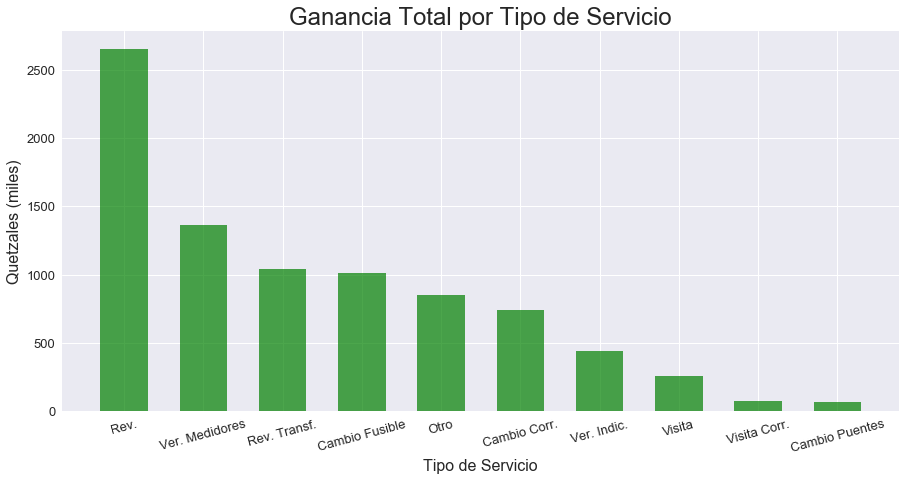

In [77]:
### GANANCIA TOTAL X TIPO DE SERVICIO
df_cod = dat.groupby("cod").agg({"ganancia":"sum"}).sort_values("ganancia",ascending=False)
df_cod["ganancia"] = df_cod["ganancia"]/1000

plt.figure(figsize=(15,7))
plt.style.use('seaborn') # ggplot|fivethirtyeight
# plt.xticks([8,10,12,14,16],fontsize=13)

plt.bar(np.arange(5,55,5),df_cod.ganancia,width=3,color="green",alpha=0.7)
plt.title("Ganancia Total por Tipo de Servicio",fontsize=24)

plt.ylabel("Quetzales (miles)",fontsize=16)
plt.yticks(fontsize=13)

plt.xlabel("Tipo de Servicio",fontsize=16)
xticks_names = ["Rev.","Ver. Medidores","Rev. Transf.","Cambio Fusible","Otro","Cambio Corr.","Ver. Indic.","Visita","Visita Corr.","Cambio Puentes"]
plt.xticks(np.arange(5,55,5),xticks_names,fontsize=13,rotation=15)

plt.margins(0.05)
plt.show()

In [78]:
dat.cod.unique()

array(['VERIFICACION_MEDIDORES', 'REVISION_TRANSFORMADOR', 'REVISION',
       'CAMBIO_FUSIBLE', 'OTRO', 'CAMBIO_CORRECTIVO',
       'VERIFICACION_INDICADORES', 'VISITA', 'VISITA_POR_CORRECCION',
       'CAMBIO_PUENTES'], dtype=object)

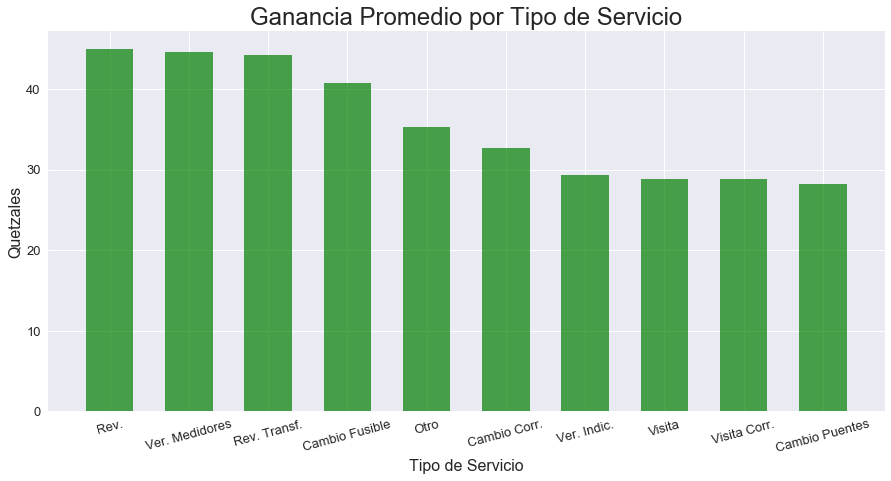

In [71]:
### GANANCIA PROMEDIO POR TIPO DE SERVICIO
df_cod = dat.groupby("cod").agg({"ganancia":"mean"}).sort_values("ganancia",ascending=False)
# df_cod["ganancia"] = df_cod["ganancia"]/1000

plt.figure(figsize=(15,7))
plt.style.use('seaborn') # ggplot|fivethirtyeight
# plt.xticks([8,10,12,14,16],fontsize=13)

plt.bar(np.arange(5,55,5),df_cod.ganancia,width=3,color="green",alpha=0.7)
plt.title("Ganancia Promedio por Tipo de Servicio",fontsize=24)

plt.ylabel("Quetzales ",fontsize=16)
plt.yticks(fontsize=13)

plt.xlabel("Tipo de Servicio",fontsize=16)
xticks_names = ["Rev.","Ver. Medidores","Rev. Transf.","Cambio Fusible","Otro","Cambio Corr.","Ver. Indic.","Visita","Visita Corr.","Cambio Puentes"]
plt.xticks(np.arange(5,55,5),xticks_names,fontsize=13,rotation=15)

plt.margins(0.05)
plt.show()

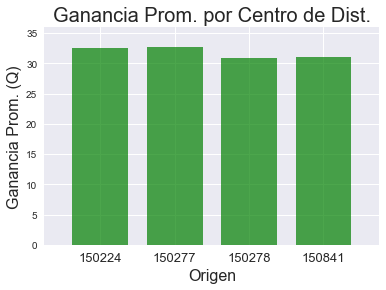

In [108]:
### GANANCIA POR MES
df_origen_profit = dat.groupby("origen").agg({"ganancia":"mean"})
df_origen_profit["ganancia"] = df_origen_profit["ganancia"]

# plt.figure(figsize=(12,7))
plt.figure(figsize=(6,4))
plt.bar(np.arange(2,9,2),df_origen_profit.ganancia,width=1.5,color="green",alpha=0.7)
plt.title("Ganancia Prom. por Centro de Dist.",fontsize=20)

plt.ylabel("Ganancia Prom. (Q)",fontsize=16)

plt.xlabel("Origen",fontsize=16)
xticks_names = df_origen_profit.index
plt.xticks(np.arange(2,9,2),xticks_names,fontsize=13)

plt.margins(0.1)
plt.show()

## Margenes operativos

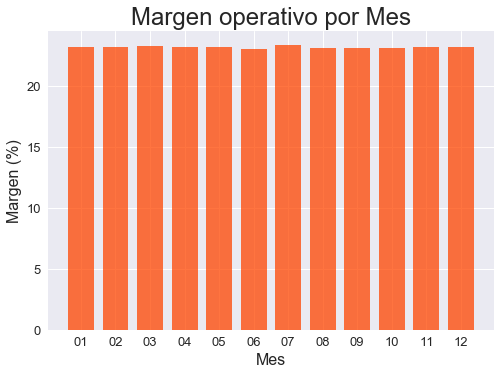

In [132]:
# MARGEN OPERATIVO POR MES
df_monthly_ratio = dat.groupby("month").agg({"factura":"sum","ganancia":"sum"})
df_monthly_ratio["ratio"] = df_monthly_ratio["ganancia"]/df_monthly_ratio["factura"]*100

# plt.figure(figsize=(12,7))
plt.title("Margen operativo por Mes",fontsize=24)
plt.ylabel("Margen (%)",fontsize=16)
plt.xlabel("Mes",fontsize=16)
plt.bar(np.arange(2,25,2),df_monthly_ratio.ratio,width=1.5,color="orangered",alpha=0.75)
# plt.plot(np.arange(2,25,2),df_monthly_ratio.ratio,color="black",marker="o")
plt.xticks(np.arange(2,25,2),['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],fontsize=13)
# plt.ylim(23.008,23.45)
plt.yticks(fontsize=13)
plt.margins(0.05)
plt.show()

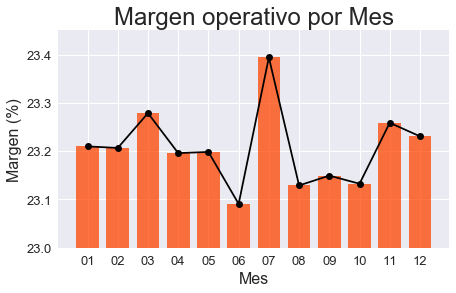

In [75]:
# MARGEN OPERATIVO POR MES ZOOM
df_monthly_ratio = dat.groupby("month").agg({"factura":"sum","ganancia":"sum"})
df_monthly_ratio["ratio"] = df_monthly_ratio["ganancia"]/df_monthly_ratio["factura"]*100

# plt.figure(figsize=(12,7))
plt.figure(figsize=(7,4))
plt.title("Margen operativo por Mes",fontsize=24)
plt.ylabel("Margen (%)",fontsize=16)
plt.xlabel("Mes",fontsize=16)
plt.bar(np.arange(2,25,2),df_monthly_ratio.ratio,width=1.5,color="orangered",alpha=0.75)
plt.plot(np.arange(2,25,2),df_monthly_ratio.ratio,color="black",marker="o")
plt.xticks(np.arange(2,25,2),['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12'],fontsize=13)
plt.ylim(23.008,23.45)
plt.yticks(np.arange(23.0,23.5,0.1),fontsize=13)
plt.margins(0.05)
plt.show()

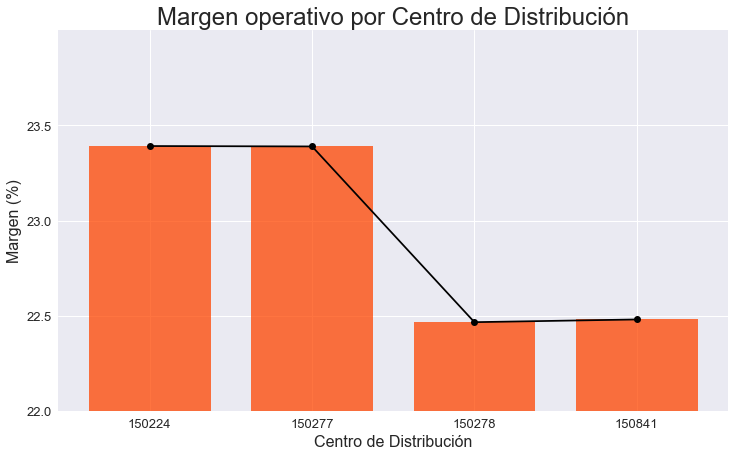

In [99]:
# MARGEN OPERATIVO POR ORIGEN
df_ubi_ratio = dat.groupby("origen").agg({"factura":"sum","ganancia":"sum"})
df_ubi_ratio["ratio"] = df_ubi_ratio["ganancia"]/df_ubi_ratio["factura"]*100

plt.figure(figsize=(12,7))
# plt.figure(figsize=(6,4))
plt.title("Margen operativo por Centro de Distribución",fontsize=24)
plt.ylabel("Margen (%)",fontsize=16)
plt.xlabel("Centro de Distribución",fontsize=16)
plt.bar(np.arange(2,10,2),df_ubi_ratio.ratio,width=1.5,color="orangered",alpha=0.75)
plt.plot(np.arange(2,10,2),df_ubi_ratio.ratio,color="black",marker="o")
plt.xticks(np.arange(2,10,2),df_ubi_ratio.index,fontsize=13)
plt.ylim(22.00,24.00)
plt.yticks(np.arange(22.0,24.0,0.5),fontsize=13)
plt.margins(0.05)
plt.show()

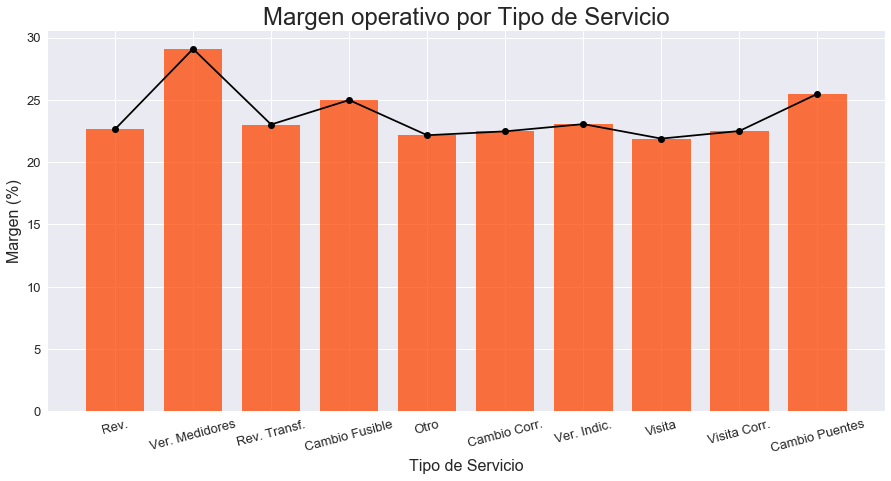

In [128]:
### MARGEN OPERATIVO POR TIPO DE SERVICIO
df_cod_ratio = dat.groupby("cod").agg({"factura":"sum","ganancia":"sum"})
df_cod_ratio["ratio"] = df_cod_ratio["ganancia"]/df_cod_ratio["factura"]*100

plt.figure(figsize=(15,7))
plt.bar(np.arange(2,21,2),df_cod_ratio.ratio,width=1.5,color="orangered",alpha=0.75)
plt.title("Margen operativo por Tipo de Servicio",fontsize=24)

plt.plot(np.arange(2,21,2),df_cod_ratio.ratio,color="black",marker="o")

# plt.xticks(np.arange(2,21,2),df_cod_ratio.index,fontsize=13)
xticks_names = ["Rev.","Ver. Medidores","Rev. Transf.","Cambio Fusible","Otro","Cambio Corr.","Ver. Indic.","Visita","Visita Corr.","Cambio Puentes"]
plt.xticks(np.arange(2,21,2),xticks_names,fontsize=13,rotation=15)

plt.xlabel("Tipo de Servicio",fontsize=16)

plt.ylabel("Margen (%)",fontsize=16)

plt.yticks(fontsize=13)
# plt.ylim(22.00,24.00)
# plt.yticks(np.arange(22.0,24.0,0.5),fontsize=13)
plt.margins(0.05)
plt.show()

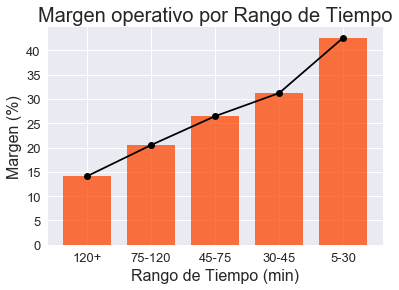

In [89]:
# MARGEN OPERATIVO POR RANGO DE TIEMPO
df_tiempo_ratio = dat.groupby("tiempo").agg({"factura":"sum","ganancia":"sum"})
df_tiempo_ratio["ratio"] = df_tiempo_ratio["ganancia"]/df_tiempo_ratio["factura"]*100
df_tiempo_ratio.sort_values("ratio",inplace=True)

# plt.figure(figsize=(15,7))
plt.figure(figsize=(6,4))
plt.bar(np.arange(2,11,2),df_tiempo_ratio.ratio,width=1.5,color="orangered",alpha=0.75)
plt.title("Margen operativo por Rango de Tiempo",fontsize=24)

plt.plot(np.arange(2,11,2),df_tiempo_ratio.ratio,color="black",marker="o")

plt.xticks(np.arange(2,11,2),df_tiempo_ratio.index,fontsize=13)
xticks_names = df_tiempo_ratio.index
plt.xticks(np.arange(2,11,2),xticks_names,fontsize=13)

plt.xlabel("Rango de Tiempo (min)",fontsize=16)

plt.ylabel("Margen (%)",fontsize=16)

plt.yticks(fontsize=13)
plt.margins(0.05)
plt.show()

## Postes

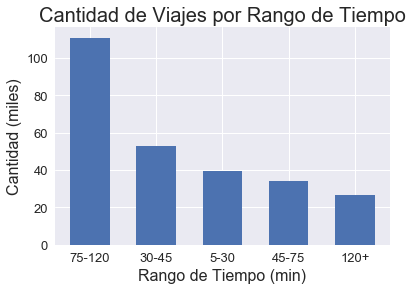

In [92]:
### NUMERO DE VIAJES POR RANGO DE TIEMPO
df_tiempo = dat.groupby("tiempo").agg({"id":"count"}).sort_values("id",ascending=False).rename(columns={"id":"cantidad"})
df_tiempo["cantidad"] = df_tiempo["cantidad"]/1000

# plt.figure(figsize=(15,7))
plt.figure(figsize=(6,4))
plt.style.use('seaborn') # ggplot|fivethirtyeight
# plt.xticks([8,10,12,14,16],fontsize=13)

plt.bar(np.arange(5,26,5),df_tiempo.cantidad,width=3)
plt.title("Cantidad de Viajes por Rango de Tiempo",fontsize=24)

plt.ylabel("Cantidad (miles)",fontsize=16)
plt.yticks(fontsize=13)

plt.xlabel("Rango de Tiempo (min)",fontsize=16)
xticks_names = df_tiempo.index
plt.xticks(np.arange(5,26,5),xticks_names,fontsize=13)

# plt.margins(0.05)
plt.show()

In [35]:
df_mant = dat.groupby(["id"],as_index=False).agg({"factura":"count"}).sort_values("factura",ascending=False).head(5).reset_index(drop=True)
df_mant.rename(columns={"factura":"Cantidad de Servicios","id":"id poste"},inplace=True)
dfi.export(df_mant, 'mantenimiento.png')
df_mant

,id poste,Cantidad de Servicios
0,477971,417
1,863979,338
2,773607,293
3,969156,271
4,337161,257


In [62]:
dat[dat["id"]==477971].cod.value_counts()

VERIFICACION_MEDIDORES      214
REVISION                    130
CAMBIO_CORRECTIVO            36
VERIFICACION_INDICADORES     26
REVISION_TRANSFORMADOR        8
CAMBIO_FUSIBLE                3
Name: cod, dtype: int64

In [63]:
dat[dat["id"]==863979].cod.value_counts()

OTRO                      325
CAMBIO_FUSIBLE              4
VISITA_POR_CORRECCION       3
REVISION                    3
CAMBIO_CORRECTIVO           2
VERIFICACION_MEDIDORES      1
Name: cod, dtype: int64

In [64]:
dat[dat["id"]==773607].cod.value_counts()

OTRO                        283
VERIFICACION_INDICADORES      3
REVISION                      2
CAMBIO_CORRECTIVO             2
VISITA_POR_CORRECCION         2
CAMBIO_FUSIBLE                1
Name: cod, dtype: int64

In [50]:
df_ganancias_viajes = dat.groupby(["id"],as_index=False).agg({"margen":"mean","factura":"count"}).sort_values("margen",ascending=False).reset_index(drop=True)
df_ganancias_viajes.rename(columns={"margen":"Margen Operativo Promedio","id":"id poste","factura":"Cantidad de Viajes"},inplace=True)
df_ganancias_viajes.head()

,id poste,Margen Operativo Promedio,Cantidad de Viajes
0,390203,11.568123,1
1,629466,8.653846,1
2,806231,8.626761,1
3,327710,7.878524,2
4,827412,7.659574,1


In [201]:
dat.id.nunique()

74239

In [216]:
### Pareto
df_top_ganancia = dat.groupby(["id"],as_index=False).agg({"ganancia":"sum"}).sort_values("ganancia",ascending=False).head(int(dat.id.nunique()*.2))
df_top_ganancia["total"] = dat.ganancia.sum()
df_top_ganancia["share"] = df_top_ganancia["ganancia"]/df_top_ganancia["total"]
df_top_ganancia["share_acum"] = df_top_ganancia.share.cumsum()
df_top_ganancia

,id,ganancia,total,share,share_acum
60480,863979,14799.0,8514077.0,0.001738,0.001738
51426,773607,13451.0,8514077.0,0.001580,0.003318
21728,477971,12247.0,8514077.0,0.001438,0.004756
71129,969156,12242.0,8514077.0,0.001438,0.006194
7560,337161,11642.0,8514077.0,0.001367,0.007562
...,...,...,...,...,...
23082,491118,157.0,8514077.0,0.000018,0.543894
50273,762169,157.0,8514077.0,0.000018,0.543912
56563,824282,157.0,8514077.0,0.000018,0.543931
32837,587200,157.0,8514077.0,0.000018,0.543949


Aproximadamente el 54% de las ganancias son producto de casi 15,000 postes. Eso representa aproximadamente el 20% de postes en la base de datos.

In [59]:
# ['120+', '75-120', '45-75', '30-45', '5-30']
dat[dat["tiempo"]=="5-30"].groupby(["id"],as_index=False).agg({"margen":"mean"}).sort_values("margen",ascending=False).head(5).reset_index(drop=True)
# dat[dat["tiempo"]=="30-45"].groupby(["id"],as_index=False).agg({"margen":"mean"}).sort_values("margen",ascending=False).head(5).reset_index(drop=True)
# dat[dat["tiempo"]=="45-75"].groupby(["id"],as_index=False).agg({"margen":"mean"}).sort_values("margen",ascending=False).head(5).reset_index(drop=True)
# dat[dat["tiempo"]=="75-120"].groupby(["id"],as_index=False).agg({"margen":"mean"}).sort_values("margen",ascending=False).head(5).reset_index(drop=True)
# dat[dat["tiempo"]=="120+"].groupby(["id"],as_index=False).agg({"margen":"mean"}).sort_values("margen",ascending=False).head(5).reset_index(drop=True)

,id,margen
0,390203,11.568123
1,803759,9.109312
2,629466,8.653846
3,806231,8.626761
4,327710,7.878524


In [150]:
dat.tiempo.unique()

array(['120+', '75-120', '45-75', '30-45', '5-30'], dtype=object)

In [147]:
dat[dat["id"]==629466]

,day,month,id,cod,origen,lat,lon,factura,height,tiempo,vehiculo,costo_total,costo_fijo,costo_directo,ganancia,margen
75416,26,04,629466,OTRO,150224,14.594557,-90.262859,40.16,8,5-30,camion,4.16,1.66,2.49,36.0,8.653846


## Otras

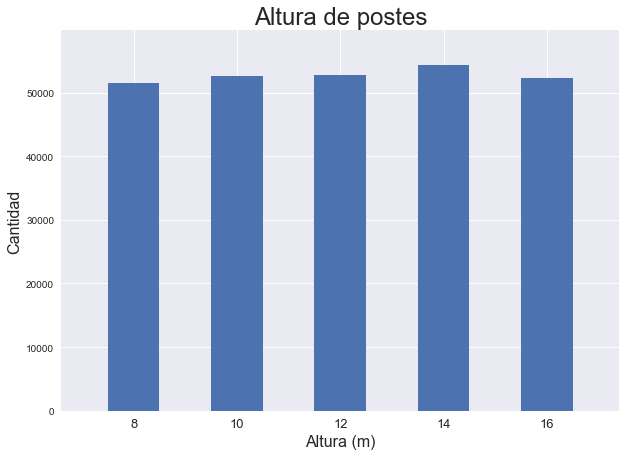

In [29]:
### Altura de postes
plt.figure(figsize=(10,7))

plt.bar(dat.height.value_counts().index,dat.height.value_counts(),width=1)
plt.title("Altura de postes",fontsize=24)
plt.ylabel("Cantidad",fontsize=16)
plt.xticks(fontsize=13)
plt.xlabel("Altura (m)",fontsize=16)

plt.margins(0.1)
plt.show()

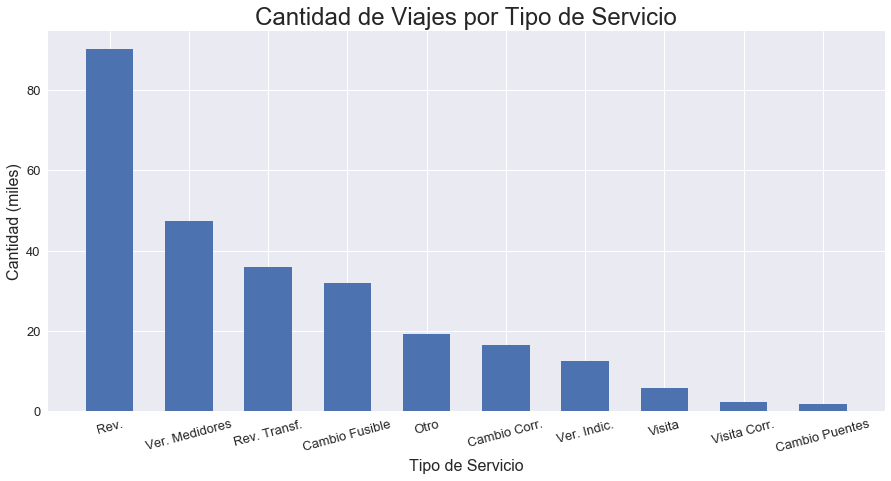

In [61]:
### Numero de Viajes x tipo de servicio
df_cod = dat.groupby("cod").agg({"id":"count"}).sort_values("id",ascending=False).rename(columns={"id":"cantidad"})
df_cod["cantidad"] = df_cod["cantidad"]/1000

plt.figure(figsize=(15,7))
plt.style.use('seaborn') # ggplot|fivethirtyeight
# plt.xticks([8,10,12,14,16],fontsize=13)

plt.bar(np.arange(5,55,5),df_cod.cantidad,width=3)
plt.title("Cantidad de Viajes por Tipo de Servicio",fontsize=24)

plt.ylabel("Cantidad (miles)",fontsize=16)
plt.yticks(fontsize=13)

plt.xlabel("Tipo de Servicio",fontsize=16)
xticks_names = ["Rev.","Ver. Medidores","Rev. Transf.","Cambio Fusible","Otro","Cambio Corr.","Ver. Indic.","Visita","Visita Corr.","Cambio Puentes"]
plt.xticks(np.arange(5,55,5),xticks_names,fontsize=13,rotation=15)

plt.margins(0.05)
plt.show()

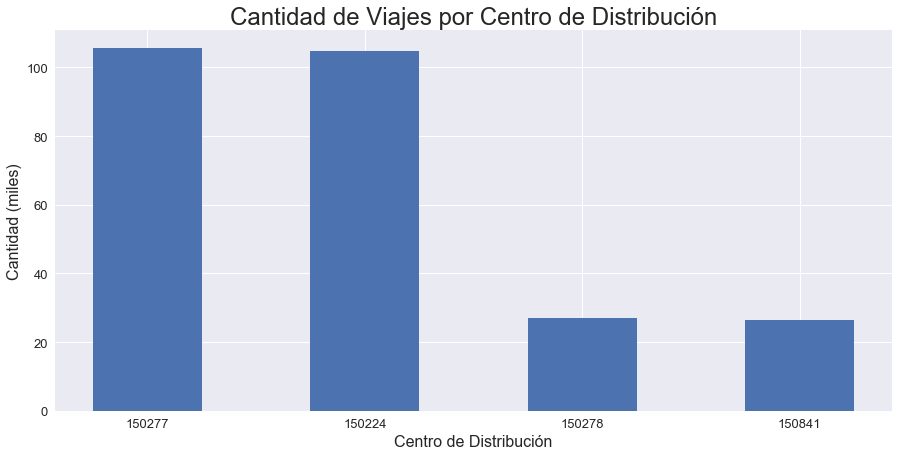

In [97]:
### Numero de Viajes x tipo de servicio
df_origen = dat.groupby("origen").agg({"id":"count"}).sort_values("id",ascending=False).rename(columns={"id":"cantidad"})
df_origen["cantidad"] = df_origen["cantidad"]/1000

plt.figure(figsize=(15,7))
# plt.figure(figsize=(6,4))
plt.style.use('seaborn') # ggplot|fivethirtyeight

plt.bar(np.arange(2,9,2),df_origen.cantidad,width=1.0)
plt.title("Cantidad de Viajes por Centro de Distribución",fontsize=24)

plt.ylabel("Cantidad (miles)",fontsize=16)
plt.yticks(fontsize=13)

plt.xlabel("Centro de Distribución",fontsize=16)
xticks_names = df_origen.index
plt.xticks(np.arange(2,9,2),xticks_names,fontsize=13)

plt.margins(0.05)
plt.show()